In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from IPython.display import display
import matplotlib.pyplot as plt
pd.set_option('max_rows', 5)
%matplotlib inline

# 単回帰分析 (simple linear regression analysis)
---
ある変数 $x$ によって別の変数 $y$ を $y=ax+b$ という形で説明・予測しようとする手法。  
データ中に存在する変数 $x$ の係数 $a$ を回帰係数 (coefficient) 、 $b$ を切片項 (intercept) という。 ( $b$ を含めて回帰係数と呼ぶこともある)

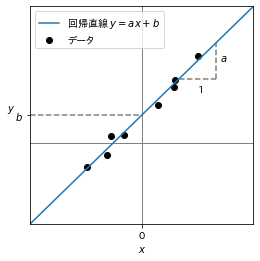

In [2]:
from my_functions.simple_linear_regression_analysis import regression_line
regression_line.show()

## 最小二乗法 (ordinary least squares)
---
データから回帰直線 $y=ax+b$ を求めるにあたって、データ中の正解 $y$ と予測値 $\hat{y}$ の差が小さくなるように $a,b$ を決めたい。このとき、正解と予測の差の二乗 $(y-\hat{y})^{2}$ が最小になるように $a,b$ を決めるのが最小二乗法。

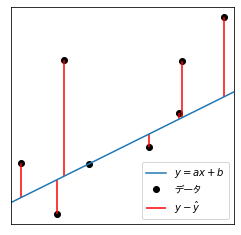

In [3]:
from my_functions.simple_linear_regression_analysis import ols
ols.show()

練習問題

---
$b=0$ として、$a$ を横軸、 $\displaystyle \sum ^{n}_{i=1}\left( y-\hat{y}\right)^{2}$ の値を縦軸にとり、 $a$ の値を変化させたときのグラフを表示する。

In [4]:
x, y = make_regression(n_features=1, random_state=1234)
reg = pd.DataFrame(dict(x=x.ravel(), y=y))
print('reg')
display(reg)

reg


,x,y
0,1.058969,95.497423
1,0.462060,41.668365
...,...,...
98,0.354020,31.925414
99,-0.469305,-42.321765


解答例

---

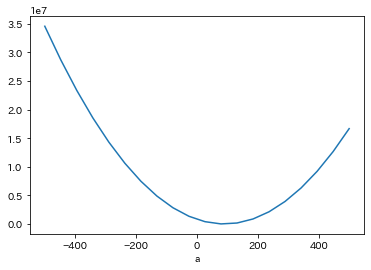

In [5]:
x = reg['x'].values.reshape((1, -1))
y = reg['y'].values
a = np.linspace(-500, 500, 20).reshape((-1, 1))
e = ((y - a * x)**2).sum(axis=1)
plt.plot(a, e)
plt.xlabel('a')
plt.show()

---

## 回帰係数の標準誤差
---
回帰直線はサンプリングされたデータを元に求めるので、サンプリングを繰り返すと毎回異なる回帰直線が得られる。つまり、回帰係数も何らかの確率分布に従う確率変数である。その分布の標準偏差 (の推定量) を回帰係数の標準誤差という。

In [6]:
from my_functions.simple_linear_regression_analysis import standard_error
standard_error.show()

Output()

## Pythonでの回帰直線の求め方
---
`sklearn.linear_model.LinearRegression`を用いる。

In [7]:
print('reg')
display(reg)

reg


,x,y
0,1.058969,95.497423
1,0.462060,41.668365
...,...,...
98,0.354020,31.925414
99,-0.469305,-42.321765


In [8]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [9]:
# 最初にインスタンスを作成
model = LinearRegression()
# fitメソッドで回帰直線を求める
# xはサイズが(サンプルサイズ × 変数の数)の行列でなければならない
x = reg['x'].values.reshape((-1, 1))
y = reg['y']
model.fit(x, y)
# 回帰係数はcoef_に格納
print('回帰係数', model.coef_)
# 切片はintercept_に格納
print('切片', model.intercept_)

回帰係数 [90.17960514]
切片 3.552713678800501e-15


練習問題

---
同一の母集団からサンプリングを行う関数`sampling`を用いて、 30 個のサンプルを取得して回帰直線を求める操作を 10,000 回繰り返し、得られた回帰係数から標準誤差を推定する。

In [10]:
def sampling(size):
    x = np.random.normal(size=size)
    y = 2 * x + np.random.normal(scale=0.3, size=size)
    return pd.DataFrame(dict(x=x, y=y))


print('samplingの使用例')
print('sampling(30)')
np.random.seed(1234)
display(sampling(30))

samplingの使用例
sampling(30)


,x,y
0,0.471435,0.823518
1,-1.190976,-2.280720
...,...,...
28,-0.183109,-0.196496
29,1.058969,2.581636


解答例

---

In [11]:
coef = np.zeros(10000)
for i in range(10000):
    data = sampling(30)
    model = LinearRegression().fit(data['x'].values.reshape((-1, 1)), data['y'])
    coef[i] = model.coef_
print(f'標準誤差 : {np.std(coef, ddof=1):.3f}')

標準誤差 : 0.058


---

## 推薦図書
---
- [Rによるやさしい統計学](https://www.amazon.co.jp/R%E3%81%AB%E3%82%88%E3%82%8B%E3%82%84%E3%81%95%E3%81%97%E3%81%84%E7%B5%B1%E8%A8%88%E5%AD%A6-%E5%B1%B1%E7%94%B0-%E5%89%9B%E5%8F%B2/dp/4274067106/)
- [心理統計学の基礎―統合的理解のために](https://www.amazon.co.jp/%E5%BF%83%E7%90%86%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%81%AE%E5%9F%BA%E7%A4%8E%E2%80%95%E7%B5%B1%E5%90%88%E7%9A%84%E7%90%86%E8%A7%A3%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AB-%E6%9C%89%E6%96%90%E9%96%A3%E3%82%A2%E3%83%AB%E3%83%9E-%E5%8D%97%E9%A2%A8%E5%8E%9F-%E6%9C%9D%E5%92%8C/dp/4641121605/)